<a href="https://colab.research.google.com/github/Akpozi/nbinteract-test/blob/master/WHO_COVID_19MLReport2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 - Pandemic!

## About COVID-19

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

**Source:**

WHO (2020): https://www.who.int/health-topics/coronavirus#tab=tab_1

## Problem Statement:

The COVID-19 startd in Wuhan, China and has spread across 182 countries of the world. New cases are arising every day with records of deaths.

As the coronavirus outbreak continues to spread in the country, the question that we as citizens of the world are trying to answer is :

How soon can we be able to tackle this pandemic and go back to our normal social and economic life?

**The Aim of this here:**

This is an attempt to develop a strong model that can predicts how the virus could spread across different countries and regions. The model prideicts the spread of the virus in the next 7 days.

**Steps taken:**
* Analyses of the present situation around the world

* Is there an identifiable trend?

* Exploring the situation in Finland and Nigeria and the top 11 most affected countries

* Forecasting the worldwide COVID-19 cases using Prophet

# Analysing WHO report on COVID-19-geographic-disbtribution-worldwide

**Import required libraries and settings**

In [0]:
# importing the required libraries
import pandas as pd
import pandas.util.testing as tm

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import folium 
#from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


# Exploring WHO Worldwide Confirmed vs Deaths Cases

Source: WHO https://who.sprinklr.com/



### Load Data from WHO on COVID-19

In [0]:
# Load data
# 6th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200406.xlsx")
# 7th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200407.xlsx")
# 8th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200413_.xlsx")
# 14th April 2020
df_WHO_Data = pd.read_csv("WHO-COVID-19-global-data_20200426.csv")
df_WHO_Data.rename(columns={'day':'Date', 'Unnamed: 8':'Comments'}, inplace=True)
print(df_WHO_Data.shape)
df_WHO_Data.tail()

(11172, 8)


,Date,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
11167,2020-04-22,ZW,Zimbabwe,AFRO,0,3,3,28
11168,2020-04-23,ZW,Zimbabwe,AFRO,1,4,0,28
11169,2020-04-24,ZW,Zimbabwe,AFRO,0,4,0,28
11170,2020-04-25,ZW,Zimbabwe,AFRO,0,4,1,29
11171,2020-04-26,ZW,Zimbabwe,AFRO,0,4,2,31


In [0]:
# Check for Empty Values
df_WHO_Data.isnull().sum()

Date                      0
Country                 126
Country Name              0
Region                   82
Deaths                    0
Cumulative Deaths         0
Confirmed                 0
Cumulative Confirmed      0
dtype: int64

In [0]:
# Check for the datatypes of column especially the Date column: should be datetime
df_WHO_Data.dtypes

Date                    object
Country                 object
Country Name            object
Region                  object
Deaths                   int64
Cumulative Deaths        int64
Confirmed                int64
Cumulative Confirmed     int64
dtype: object

In [0]:
# Change Date to datetime datatype
df_WHO_Data['Date'] = pd.to_datetime(df_WHO_Data['Date'])
df_WHO_Data.tail()

,Date,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
11167,2020-04-22,ZW,Zimbabwe,AFRO,0,3,3,28
11168,2020-04-23,ZW,Zimbabwe,AFRO,1,4,0,28
11169,2020-04-24,ZW,Zimbabwe,AFRO,0,4,0,28
11170,2020-04-25,ZW,Zimbabwe,AFRO,0,4,1,29
11171,2020-04-26,ZW,Zimbabwe,AFRO,0,4,2,31


In [0]:
# Check dataype again
df_WHO_Data.dtypes

Date                    datetime64[ns]
Country                         object
Country Name                    object
Region                          object
Deaths                           int64
Cumulative Deaths                int64
Confirmed                        int64
Cumulative Confirmed             int64
dtype: object

**Rename Columns**

In [0]:
## Data after Renaming the columns ...
df_WHO_Data.columns=["Date", "Country Code", "Country", "Region", "Daily Deaths", "Cumulative Deaths","New Cases", "Cumulative Confirmed"]
print(df_WHO_Data.shape)
df_WHO_Data.tail()

(11172, 8)


,Date,Country Code,Country,Region,Daily Deaths,Cumulative Deaths,New Cases,Cumulative Confirmed
11167,2020-04-22,ZW,Zimbabwe,AFRO,0,3,3,28
11168,2020-04-23,ZW,Zimbabwe,AFRO,1,4,0,28
11169,2020-04-24,ZW,Zimbabwe,AFRO,0,4,0,28
11170,2020-04-25,ZW,Zimbabwe,AFRO,0,4,1,29
11171,2020-04-26,ZW,Zimbabwe,AFRO,0,4,2,31


### Compute

**Total number of confirmed COVID 2019 cases Worldwide**

**and**

**Total number of deaths COVID 2019 cases Worldwide**

**Confirmed cases**

In [0]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
wDate = df_WHO_Data['Date']
#df.drop(['S. No.'],axis=1,inplace=True)
df_WHO_Data['Total Number of Cases'] = df_WHO_Data['New Cases']
who_total_cases = df_WHO_Data['Total Number of Cases'].sum()
print('Total number of confirmed COVID 2019 cases Worldwide till date', max(wDate),'is:', who_total_cases)

Total number of confirmed COVID 2019 cases Worldwide till date 2020-04-26 00:00:00 is: 2810325


**Deaths cases**

In [0]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
wDate = df_WHO_Data['Date']
df_WHO_Data['Total Number of Deaths'] = df_WHO_Data['Daily Deaths']
who_total_deaths = df_WHO_Data['Total Number of Deaths'].sum()
print('Total number of deaths COVID 2019 cases Worldwide till date', max(wDate),'is:', who_total_deaths)

Total number of deaths COVID 2019 cases Worldwide till date 2020-04-26 00:00:00 is: 193825


## Visualizing: WHO Worldwide NCOVID-19 cases

###Table of Active and Deaths Worldwide

In [0]:
#Learn how to use Seaborn for visualization
print('Total number of Active and Deaths COVID 2019 cases worldwide', max(wDate),'is:', who_total_cases, 'and', who_total_deaths, '\n')
Tot_ActiveDeathCases = df_WHO_Data.groupby('Country')['Total Number of Cases', 'Total Number of Deaths'].sum().sort_values(by=['Total Number of Cases'],ascending=False)
Tot_ActiveDeathCases.style.background_gradient(cmap='Reds')

Total number of Active and Deaths COVID 2019 cases worldwide 2020-04-26 00:00:00 is: 2810325 and 193825 



,Total Number of Cases,Total Number of Deaths
Country,,
United States of America,899281,46204
Spain,219764,22524
Italy,195351,26384
Germany,154175,5640
The United Kingdom,148381,20319
France,122875,22580
Turkey,107773,2706
Iran (Islamic Republic of),90481,5710
China,84338,4642


### Worldwide Graphical View

In [0]:
# set confirmed and deaths values for display
confirmed = df_WHO_Data.groupby('Date').sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.groupby('Date').sum()['Total Number of Deaths'].reset_index()
who_Total_ActiveCases = df_WHO_Data['Total Number of Cases'].sum()
who_Total_Deaths = df_WHO_Data['Total Number of Deaths'].sum()

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Number of Cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Total Number of Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Daily Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()
print('Total Active Cases Worldwide:', who_Total_ActiveCases)
print('Total Deaths Cases Worldwide:', who_Total_Deaths)

Total Active Cases Worldwide: 2810325
Total Deaths Cases Worldwide: 193825


### query() function: To View and analise specific country

*   List item
*   List item



In [0]:
# Check for specific country's data
qucountry = df_WHO_Data.query('Country=="Finland"').groupby("Date")[['Total Number of Cases', 'Total Number of Deaths']].sum().reset_index()
qucountry.tail()

,Date,Total Number of Cases,Total Number of Deaths
84,2020-04-22,146,43
85,2020-04-23,115,8
86,2020-04-24,155,23
87,2020-04-25,111,5
88,2020-04-26,80,9


#### View top 11 countries affected and Finland / Nigeria

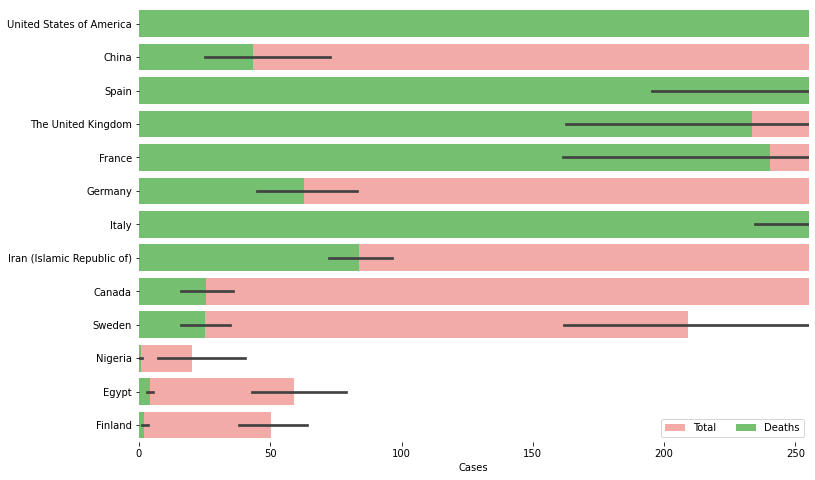

In [0]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
dat = Tot_ActiveDeathCases
#print(dat)
df_whofull = pd.merge(dat,df_WHO_Data,on='Country')
#print(df_whofull)
#Pick top 11 countries affected and Finland / Nigeria
data = df_whofull[(df_whofull.Country == 'United States of America') | (df_whofull.Country == 'Spain') 
| (df_whofull.Country == 'Sweden') | (df_whofull.Country == 'Italy') | (df_whofull.Country == 'Germany') 
| (df_whofull.Country == 'China') | (df_whofull.Country == 'France') | (df_whofull.Country == 'Iran (Islamic Republic of)') 
| (df_whofull.Country == 'The United Kingdom') | (df_whofull.Country == 'Canada') | (df_whofull.Country == 'Finland') 
| (df_whofull.Country == 'Egypt') | (df_whofull.Country == 'Nigeria')]
[['Country', 'Total Number of Cases_y', 'Total Number of Deaths_y']]
data.sort_values('Total Number of Cases_y',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Number of Cases_y", y="Country", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Total Number of Deaths_y", y="Country", data=data, label="Deaths", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 255), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

# Visualizing: Finland NCOVID-19 cases

**Table Data View**

In [0]:
# Check for Finland's data
print('COVID-19 Status in Finland as at', max(wDate), '\n')
Finland = df_WHO_Data.query('Country=="Finland"').groupby("Date")[['Total Number of Cases', 'Total Number of Deaths']].sum().reset_index().sort_values(by='Date',ascending=False)
Finland.style.background_gradient(cmap='Blues')

COVID-19 Status in Finland as at 2020-04-24 00:00:00 



,Date,Total Number of Cases,Total Number of Deaths
86,2020-04-24 00:00:00,0,0
85,2020-04-23 00:00:00,115,8
84,2020-04-22 00:00:00,146,43
83,2020-04-21 00:00:00,85,4
82,2020-04-20 00:00:00,102,4
81,2020-04-19 00:00:00,192,8
80,2020-04-18 00:00:00,120,7
79,2020-04-17 00:00:00,132,3
78,2020-04-16 00:00:00,76,8
77,2020-04-15 00:00:00,97,5


**Interactive graph view**

In [0]:
# set confirmed and deaths values for display
confirmed = df_WHO_Data.query('Country=="Finland"').groupby('Date').sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.query('Country=="Finland"').groupby('Date').sum()['Total Number of Deaths'].reset_index()
who_finland_Total_ActiveCases = df_WHO_Data.query('Country=="Finland"')['Total Number of Cases'].sum()
who_finland_Total_Deaths = df_WHO_Data.query('Country=="Finland"')['Total Number of Deaths'].sum()

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Number of Cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Total Number of Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Finland NCOVID-19 Daily Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()
print('Total Active Cases Finland:', who_finland_Total_ActiveCases)
print('Total Deaths Cases Finland:', who_finland_Total_Deaths)

Total Active Cases Finland: 4129
Total Deaths Cases Finland: 149


# Forecasting Total Number of Confirmed Cases and Death Cases Worldwide Using Prophet



## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


**Why Prophet?**

Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

**Fully automatic:**
Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

**Tunable forecasts:**
The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

**Available in R or Python:**
Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

** **

**References**

https://facebook.github.io/prophet/

https://facebook.github.io/prophet/docs/

https://github.com/facebook/prophet

https://facebook.github.io/prophet/docs/quick_start.html


In [0]:
# Import Prophet
from fbprophet import Prophet

In [0]:
# Prepare and Indicate Number of Cases and Number of Deaths
#confirmed = df_WHO_Data.groupby('Date').sum()['Total Number of Cases'].reset_index()
confirmed = df_WHO_Data.query('Country=="Finland"').groupby("Date").sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.groupby('Date').sum()['Total Number of Deaths'].reset_index()
who_Total_ActiveCases = df_WHO_Data['Total Number of Cases'].sum()
who_Total_Deaths = df_WHO_Data['Total Number of Deaths'].sum()

In [0]:
#Finland = df_WHO_Data.query('Country=="Finland"').groupby("Date").sum()['Total Number of Cases'].reset_index()
#Finland.style.background_gradient(cmap='Blues')

## Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)




The input to Prophet is always a dataframe with two columns: **ds** and **y**. The ds (**datestamp**) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

print('Most rescent confirmed cases')
confirmed.tail()

Most rescent confirmed cases


,ds,y
84,2020-04-22,146
85,2020-04-23,115
86,2020-04-24,155
87,2020-04-25,111
88,2020-04-26,80


**Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval** by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
m = Prophet(interval_width=0.95) #, yearly_seasonality='auto', daily_seasonality='auto'
m.fit(Finland)
future = m.make_future_dataframe(periods=14, include_history=True)
#future.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The **predict** method will assign each row in future a predicted value which it names *yhat*. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column **yhat** with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
new_cases = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)
# new_cases
# Rename Columns
print('Forecasting Worldwide New cases as at:', max(wDate), '\n')
new_cases.columns=["Date", "predicted_value", "lower_predicted_value", "upper_predicted_value"]
new_cases

Forecasting Worldwide New cases as at: 2020-04-26 00:00:00 



,Date,predicted_value,lower_predicted_value,upper_predicted_value
88,2020-04-26,151.663543,78.669655,229.757238
89,2020-04-27,114.046007,37.481716,187.237911
90,2020-04-28,139.302289,62.213743,213.462965
91,2020-04-29,137.197783,57.282690,214.683239
92,2020-04-30,142.582840,71.881304,221.865954
93,2020-05-01,142.042981,75.438934,216.140628
94,2020-05-02,145.273489,69.267110,219.599071
95,2020-05-03,164.893511,88.111116,244.830803
96,2020-05-04,127.275975,48.812090,200.117506
97,2020-05-05,152.532257,71.764860,228.392649


**Plot the forecast** by calling the **Prophet.plot** method and passing in your forecast dataframe.[link text](https://)

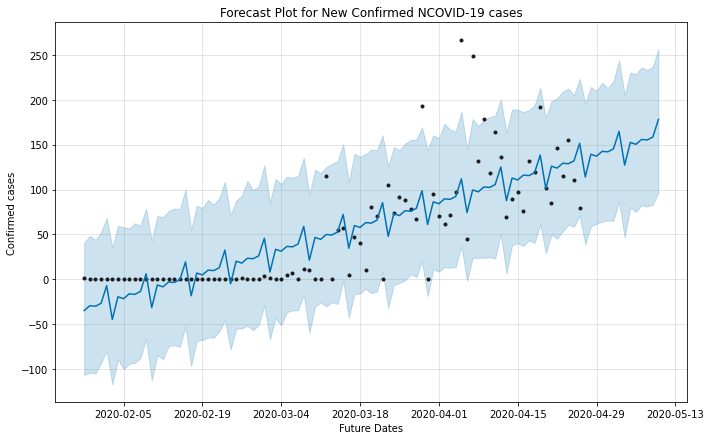

In [0]:
# Plot the Forecast for Worldwide NCOVID-19 New Confirmed cases
confirmed_forecast_plot = m.plot(forecast)
# Add plot title and other plot elements the normal way
plt.title('Forecast Plot for New Confirmed NCOVID-19 cases')
plt.xlabel('Future Dates')
plt.ylabel('Confirmed cases')

plt.show()

**Plot other plot elements**

Note: ds is the Future Dates



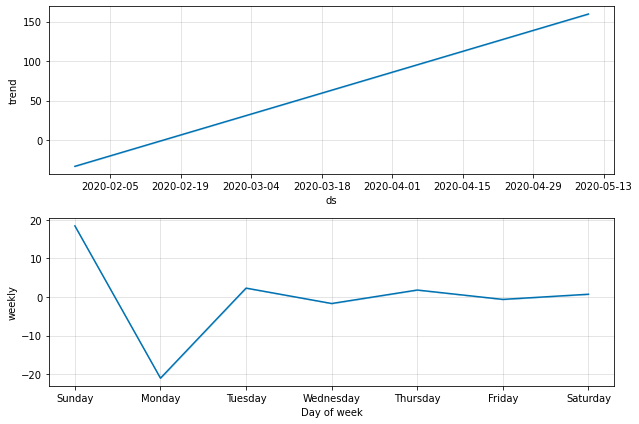

In [0]:
confirmed_forecast_plot = m.plot_components(forecast)
# Add plot title and other plot elements the normal way
print("Note: ds is the Future Dates\n")

## Forecasting Worldwide Deaths using Prophet (Base model)



The input to Prophet is always a dataframe with two columns: **ds** and **y**. The ds (**datestamp**) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.





In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

print('Most rescent Death cases')
deaths.tail()

Most rescent Death cases


,ds,y
103,2020-04-20,5261
104,2020-04-21,5118
105,2020-04-22,6060
106,2020-04-23,6675
107,2020-04-24,2877


**Generating a week ahead forecast of deaths cases of NCOVID-19 using Prophet, with 95% prediction interval** by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
dm = Prophet(interval_width=0.95) #,changepoint_prior_scale=0.15, yearly_seasonality=True, daily_seasonality=True
dm.fit(deaths)
dfuture = dm.make_future_dataframe(periods=14, include_history=True)
# future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column **yhat** with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
dforecast = dm.predict(dfuture)
new_deaths = dforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)
new_deaths
# Rename Columns
print('Forecasting Worldwide Death cases as at:', max(wDate), '\n')
new_deaths.columns=["Date", "predicted_value", "lower_predicted_value", "upper_predicted_value"]
new_deaths

Forecasting Worldwide Death cases as at: 2020-04-24 00:00:00 



,Date,predicted_value,lower_predicted_value,upper_predicted_value
107,2020-04-24,7022.589497,5394.982864,8552.094643
108,2020-04-25,7441.328504,5693.809938,9004.553665
109,2020-04-26,7351.004659,5677.223719,8905.518369
110,2020-04-27,7335.336492,5595.989032,8912.705298
111,2020-04-28,7429.415683,5875.538260,8991.816765
112,2020-04-29,7805.243479,6227.494073,9396.432774
113,2020-04-30,8122.190817,6509.623841,9713.751951
114,2020-05-01,8047.518535,6448.462192,9592.638148
115,2020-05-02,8466.257542,6893.085039,9996.813281
116,2020-05-03,8375.933696,6847.230734,9942.151241


**Plot the forecast** by calling the **Prophet.plot** method and passing in your forecast dataframe.[link text](https://)

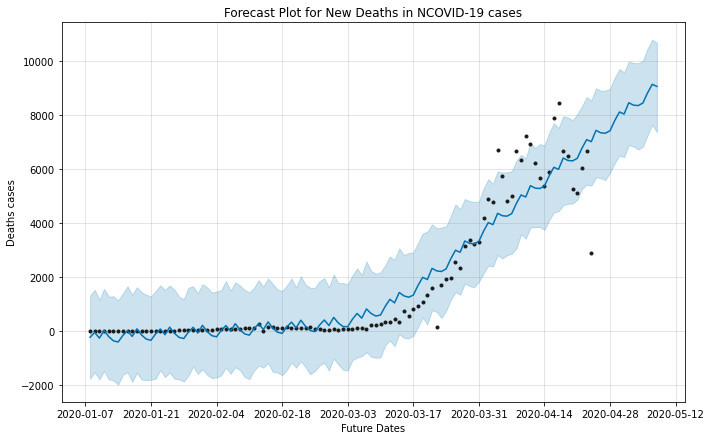

In [0]:
# Plot the Forecast for Worldwide NCOVID-19 New Death cases
deaths_forecast_plot = dm.plot(dforecast)
# Add plot title and other plot elements the normal way
plt.title('Forecast Plot for New Deaths in NCOVID-19 cases')
plt.xlabel('Future Dates')
plt.ylabel('Deaths cases')

plt.show()

**Plot other plot elements**

Note: ds is the Future Dates



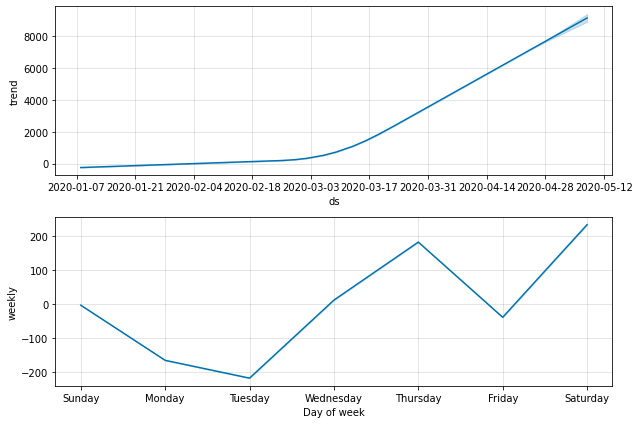

In [0]:
deaths_forecast_plot = dm.plot_components(dforecast)
# Add plot title and other plot elements the normal way
print("Note: ds is the Future Dates\n")

# COVID-19 Symptoms


## Coronavirus

The COVID-19 virus affects different people in different ways.  COVID-19 is a respiratory disease and most infected people will develop mild to moderate symptoms and recover without requiring special treatment.  People who have underlying medical conditions and those over 60 years old have a higher risk of developing severe disease and death.

Common symptoms include:

*  fever

*  tiredness

*  dry cough.

Other symptoms include:

*  shortness of breath

*  aches and pains

*  sore throat

*  and very few people will report diarrhoea, nausea or a runny nose.

People with mild symptoms who are otherwise healthy should self-isolate and contact their medical provider or a COVID-19 information line for advice on testing and referral.

People with fever, cough or difficulty breathing should call their doctor and seek medical attention.



**Source:**

WHO: https://www.who.int/health-topics/coronavirus#tab=tab_3


CDC: https://www.cdc.gov/coronavirus/2019-ncov/


![alt text](https://www.cdc.gov/coronavirus/2019-ncov/images/social/covid-19-symptoms-v03.png)

## Prevention

To prevent infection and to slow transmission of COVID-19, do the following:

1. Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.

2. Maintain at least 1 metre distance between you and people coughing or sneezing.
Avoid touching your face.

3. Cover your mouth and nose when coughing or sneezing.

4. Stay home if you feel unwell.

5. Refrain from smoking and other activities that weaken the lungs.

6. Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people.

# Data Source:

**World Health Organization**

WHO

**Website:**

https://who.sprinklr.com/